Shreya K

Date - 

Data Source - https://archive.ics.uci.edu/dataset/222/bank+marketing

For Feature values refer - bank-additional-names.txt


Aim - 

(1) To draw an analysis of various parameters that would help in concluding if the customer would 
subscribe to the term deposit plan.




<h1> Import Libraries </h1>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

<h1> Load dataset </h1>

In [56]:
bank = pd.read_csv("C:\\Users\\mymac\\Documents\\Kaggle\\Bank_Marketing\\bank-additional\\bank-additional-full.csv",
                   sep = ';'
                   
                   )

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.shape

(41188, 21)

In [5]:
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

<h1> Look for null data </h1>

In [8]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Some of the null values have been labelled as "unknown"
columnwise traversal is done, to count for the unknown data

In [9]:
for col in bank.columns:
    null_values = bank[bank[col] == 'unknown'].shape[0]
    if null_values != 0:
        print(f"Number of null values in {col} is {null_values}")

Number of null values in job is 330
Number of null values in marital is 80
Number of null values in education is 1731
Number of null values in default is 8597
Number of null values in housing is 990
Number of null values in loan is 990


In [ ]:
# binary_cat_var must be 0/1 (or will be internally converted)
corr, p_value = pointbiserialr(df['binary_cat_var'], df['numeric_var'])

print("Correlation:", corr)
print("P-value:", p_value)


In [69]:
encoder = LabelEncoder()
bank['y_data'] = encoder.fit_transform(bank['y'])
bank.loc[:,['y','y_data']]

,y,y_data
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,no,0
41186,yes,1


In [91]:
numeric_types


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_data'],
      dtype='object')

ind is  [ 0  1  2  3  4  5  6  7  8  9 10]


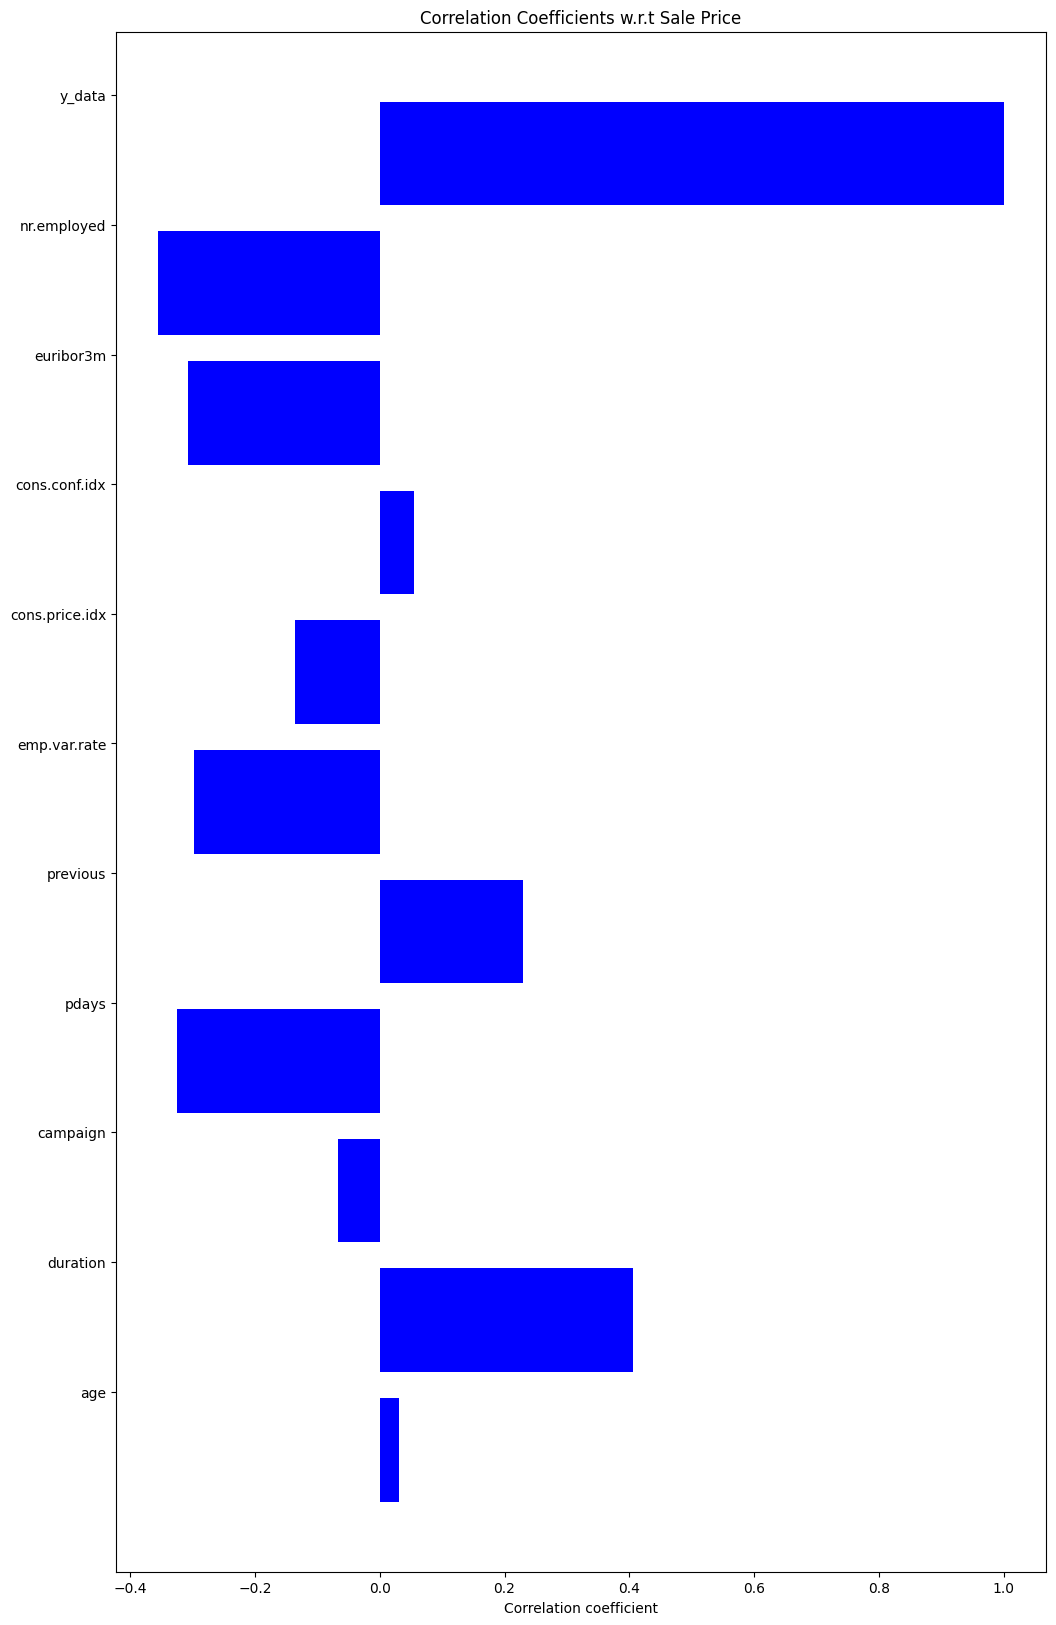

In [ ]:
numeric_types = bank.columns[bank.dtypes != object]

labels = []
corr_values = []
p_values = []
for col in numeric_types:
    labels.append(col)
    corr, p_value = pointbiserialr(bank['y_data'], bank[col])
    corr_values.append(corr)
    p_values.append(p_value)



    
ind = np.arange(len(labels))
print("ind is ",ind)
width = 0.9
fig, ax = plt.subplots(figsize=(12,20))
rects = ax.barh(ind, np.array(corr_values), color='blue')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price"); 


In [90]:
feat_corr_pval = {
    'feature_name':labels,
    'correlation_with_tgt':corr_values,
    'p_value':p_values
}

point_biserial_feat_cor_pvalue = pd.DataFrame(feat_corr_pval)
point_biserial_feat_cor_pvalue['p_value'] = point_biserial_feat_cor_pvalue['p_value'].astype('float64')
point_biserial_feat_cor_pvalue

,feature_name,correlation_with_tgt,p_value
0,age,0.030399,6.802136e-10
1,duration,0.405274,0.000000e+00
2,campaign,-0.066357,2.007780e-41
3,pdays,-0.324914,0.000000e+00
4,previous,0.230181,0.000000e+00
5,emp.var.rate,-0.298334,0.000000e+00
6,cons.price.idx,-0.136211,9.318965e-170
7,cons.conf.idx,0.054878,7.536665e-29
8,euribor3m,-0.307771,0.000000e+00
9,nr.employed,-0.354678,0.000000e+00


In [95]:
bank_numeric_data = bank.loc[:,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
correlations=bank_numeric_data.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
0,"(emp.var.rate, euribor3m)",0.972245
3,"(cons.price.idx, emp.var.rate)",0.775334
1,"(cons.price.idx, euribor3m)",0.688230
2,"(pdays, previous)",-0.587514


In [104]:
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<Axes: >

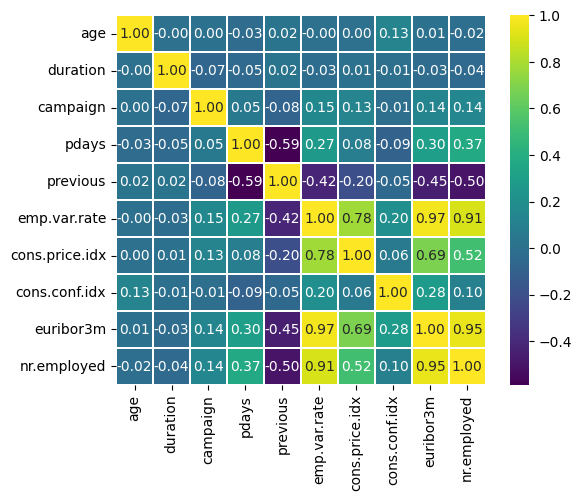

In [106]:
corr_matrix = bank_numeric_data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='viridis',linecolor='white',linewidths=0.01,square=True,fmt = "0.2f")

<h4> unknown values in the job column have been imputed based on class label </h4>

In [10]:
bank['job'].value_counts(dropna=False)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
bank[bank['job'] == 'unknown']['education'].value_counts(normalize=True)*100

education
unknown                39.696970
basic.4y               15.757576
university.degree      13.636364
high.school            11.212121
basic.9y                9.393939
basic.6y                6.666667
professional.course     3.636364
Name: proportion, dtype: float64

In [12]:
bank[bank.y == 'yes']['job'].value_counts().sort_values(ascending=False).index[0]

'admin.'

In [13]:
bank[bank.y == 'no']['job'].value_counts().sort_values(ascending=False).index[0]

'admin.'

In [14]:
bank[bank['job'] == 'admin.']['education'].value_counts(normalize=True)*100

education
university.degree      55.200537
high.school            31.942046
basic.9y                4.787949
professional.course     3.483017
unknown                 2.389177
basic.6y                1.448858
basic.4y                0.738822
illiterate              0.009595
Name: proportion, dtype: float64

In [15]:
# bank['job'] = bank.job.str.replace('unknown','admin.')

<h5> Imputation based on class label for education </h5>

In [16]:
bank.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [17]:
bank[bank.education == 'unknown']['job'].value_counts(normalize=True)*100

job
blue-collar      26.227614
admin.           14.384749
technician       12.247256
student           9.647603
services          8.665511
unknown           7.567880
management        7.105719
retired           5.661467
entrepreneur      3.292894
housemaid         2.426343
self-employed     1.675332
unemployed        1.097631
Name: proportion, dtype: float64

In [18]:
bank[bank.y == 'yes']['education'].value_counts().index[0]

'university.degree'

In [19]:
bank[bank.y == 'no']['education'].value_counts().index[0]

'university.degree'

In [20]:
bank[bank.education == 'university.degree']['job'].value_counts(normalize=True)*100

job
admin.           47.279750
management       16.954306
technician       14.866864
self-employed     6.286982
entrepreneur      5.013149
retired           2.342209
unemployed        2.153189
services          1.421762
student           1.397107
housemaid         1.142341
blue-collar       0.772518
unknown           0.369822
Name: proportion, dtype: float64

In [21]:
bank['job'] = bank.job.str.replace('unknown','admin.')
bank['education'] = bank.education.str.replace('unknown','university.degree')

In [22]:
bank.default.value_counts(normalize=True)*100


default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64

In [23]:
bank.marital.value_counts(normalize=True)*100

marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64

In [24]:
bank.housing.value_counts(normalize=True)*100

housing
yes        52.384190
no         45.212198
unknown     2.403613
Name: proportion, dtype: float64

In [25]:
bank.loan.value_counts(normalize=True)*100

loan
no         82.426920
yes        15.169467
unknown     2.403613
Name: proportion, dtype: float64

<h2>Univariate analysis of age </h2>

In [26]:
age_bin_dict = {
    1:(17,26),
    2:(27,36),
    3:(37,46),
    4:(47,56),
    5:(57,66),
    6:(67,76),
    7:(77,86),
    8:(87,96),
    9:(97,100)

}



In [27]:
bank['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [ ]:
print(f"Minimum age of the client is {bank.age.min()}")
print(f"Maximum age of the client is {bank.age.max()}")


def age_binning(age_list):
    bin_data = []

    for age_data in age_list:
        if age_data >= 17 and age_data <= 26:
            bin_data.append(1)
        elif age_data >= 27 and age_data <= 36:
            bin_data.append(2)
        elif age_data >= 37 and age_data <= 46:
            bin_data.append(3)
        elif age_data >= 47 and age_data <= 56:
            bin_data.append(4)
        elif age_data >= 57 and age_data <= 66:
            bin_data.append(5)
        elif age_data >= 67 and age_data <= 76:
            bin_data.append(6)
        elif age_data >= 77 and age_data <= 86:
            bin_data.append(7)
        elif age_data >= 87 and age_data <= 96:
            bin_data.append(8)
        elif age_data >= 97 and age_data <= 100:
            bin_data.append(9)
        else:
            pass 

    return bin_data





Minimum age of the client is 17
Maximum age of the client is 98


In [39]:
bin_data = age_binning(bank.age.values)
bank['age_bin'] = bin_data

bank_age  = bank['age_bin'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
age_range = []
for bin in bank_age['age_bin'].values:
    range_value = age_bin_dict[bin]
    age_range.append(range_value)

bank_age['age_range'] = age_range
bank_age['proportion(percent)'] = bank_age['proportion']*100
bank_age.drop('proportion',axis = 1,inplace = True)

bank_age['age_range'] = bank_age['age_range'].astype('str')


<Axes: xlabel='age_range', ylabel='proportion(percent)'>

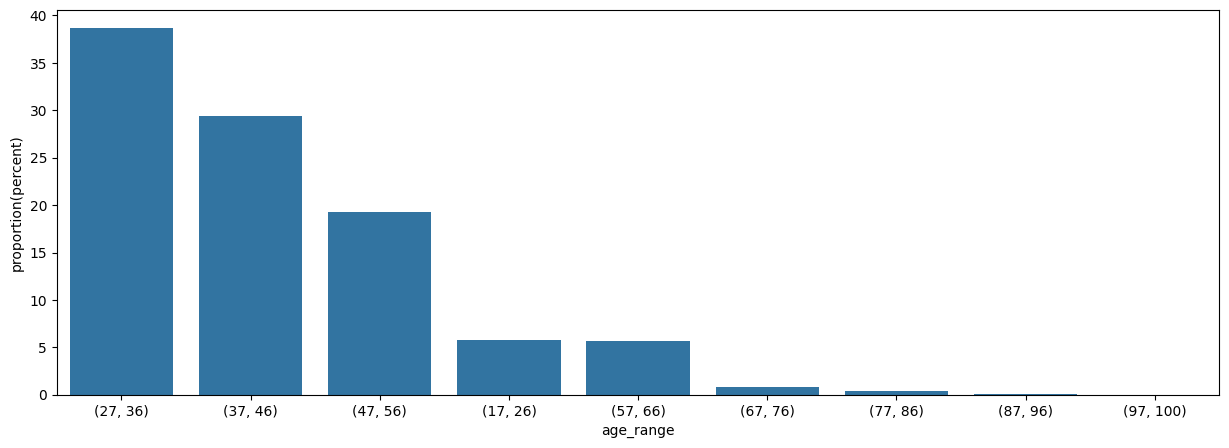

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'age_range',y = 'proportion(percent)',data = bank_age)

<Axes: xlabel='age', ylabel='Density'>

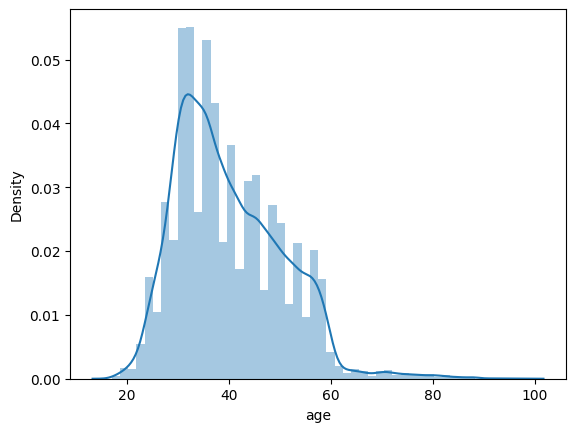

In [44]:
sns.distplot(bank['age'])

In [40]:
term_insur_subscribed = bank[bank.y == 'yes']
term_sub_data = age_binning(term_insur_subscribed.age.values)
term_insur_subscribed['age_bin'] = term_sub_data

term_sub_age  = term_insur_subscribed['age_bin'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
age_range = []
for bin in term_sub_age['age_bin'].values:
    range_value = age_bin_dict[bin]
    age_range.append(range_value)

term_sub_age['age_range'] = age_range
term_sub_age['proportion(percent)'] = term_sub_age['proportion']*100
term_sub_age.drop('proportion',axis = 1,inplace = True)

term_sub_age['age_range'] = term_sub_age['age_range'].astype('str')


term_insur_unsubscribed = bank[bank.y == 'no']
term_unsub_data = age_binning(term_insur_unsubscribed.age.values)
term_insur_unsubscribed['age_bin'] = term_unsub_data

term_unsub_age  = term_insur_unsubscribed['age_bin'].value_counts(normalize=True).sort_values(ascending=False).reset_index()
age_range = []
for bin in term_unsub_age['age_bin'].values:
    range_value = age_bin_dict[bin]
    age_range.append(range_value)

term_unsub_age['age_range'] = age_range
term_unsub_age['proportion(percent)'] = term_unsub_age['proportion']*100
term_unsub_age.drop('proportion',axis = 1,inplace = True)

term_unsub_age['age_range'] = term_unsub_age['age_range'].astype('str')


In [46]:
print("Percentage data based on age on the number of people who subscribed term deposit")
print("\n\n")
term_sub_age


Percentage data based on age on the number of people who subscribed term deposit





,age_bin,age_range,proportion(percent)
0,2,"(27, 36)",38.189655
1,3,"(37, 46)",21.939655
2,4,"(47, 56)",15.474138
3,1,"(17, 26)",10.150862
4,5,"(57, 66)",8.620690
5,6,"(67, 76)",3.232759
6,7,"(77, 86)",2.025862
7,8,"(87, 96)",0.323276
8,9,"(97, 100)",0.043103


In [47]:
print("Percentage data based on age on the number of people who did not subscribe term deposit")
print("\n\n")
term_unsub_age


Percentage data based on age on the number of people who did not subscribe term deposit





,age_bin,age_range,proportion(percent)
0,2,"(27, 36)",38.735362
1,3,"(37, 46)",30.305352
2,4,"(47, 56)",19.713801
3,5,"(57, 66)",5.242421
4,1,"(17, 26)",5.179490
5,6,"(67, 76)",0.549962
6,7,"(77, 86)",0.224362
7,8,"(87, 96)",0.049250


In [48]:
excess_kurtosis = round(kurtosis(bank['age'].values),2)
print(f"the value of excess kurtosis in age is {excess_kurtosis}")
print(f"Kurtosis value of age is {excess_kurtosis + 3}")

the value of excess kurtosis in age is 0.79
Kurtosis value of age is 3.79


Conclusions - 

Most of the targeted clients are within the age range of 27 to 46 years of age.

The upper and the lower age limits form a small percetnage of targeted clients.

Based on the kurtosis we can say that there is no significant presence of outliers


In [53]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
age_bin             int64
dtype: object

In [55]:
bank.columns[bank.dtypes != object]

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'age_bin'],
      dtype='object')